In [1]:
%pylab inline
import pandas as pd
import seaborn as sns
import numpy as np
from collections import Counter
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)

Populating the interactive namespace from numpy and matplotlib


In [2]:
X = pd.read_csv('C:/Users/VOLANTE/anaconda3/envs/OC/P7/X_credit.csv', index_col = 0)

In [3]:
y =  pd.read_csv('C:/Users/VOLANTE/anaconda3/envs/OC/P7/y_credit.csv', index_col = 0)

In [4]:
X.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,AGE,CREDIT_INCOME_PERCENT
2,67500.0,135000.0,6750.0,135000.0,225,4260.0,2531,2,0,0,0,0.555912,0.729567,6,2.000000
5,99000.0,490495.5,27517.5,454500.0,1588,4970.0,477,2,0,0,0,0.354225,0.621226,5,4.954500
6,171000.0,1560726.0,41301.0,1395000.0,3130,1213.0,619,2,0,0,0,0.724000,0.492060,3,9.127053
7,360000.0,1530000.0,42075.0,1530000.0,449,4597.0,2379,3,0,1,1,0.714279,0.540654,6,4.250000
10,112500.0,652500.0,21177.0,652500.0,679,4427.0,738,2,0,0,0,0.651862,0.363945,1,5.800000


In [5]:
X.reset_index(drop = True, inplace = True)

In [6]:
X.head(4)

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,AGE,CREDIT_INCOME_PERCENT
0,67500.0,135000.0,6750.0,135000.0,225,4260.0,2531,2,0,0,0,0.555912,0.729567,6,2.000000
1,99000.0,490495.5,27517.5,454500.0,1588,4970.0,477,2,0,0,0,0.354225,0.621226,5,4.954500
2,171000.0,1560726.0,41301.0,1395000.0,3130,1213.0,619,2,0,0,0,0.724000,0.492060,3,9.127053
3,360000.0,1530000.0,42075.0,1530000.0,449,4597.0,2379,3,0,1,1,0.714279,0.540654,6,4.250000


In [7]:
y.tail()

,TARGET
307448,1
307475,1
307481,1
307489,1
307509,1


In [8]:
# Giving an array
y = y.values

In [9]:
# Ravel
y = y.ravel()

In [10]:
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

###############################################################################################################################

## Resampling

In [11]:
# Getting proportions
counter = Counter(y)
for k, v in counter.items():
    dist = v / len(y) * 100
    print(f"Class={k}, n={v}, ({dist})%)")

Class=0, n=184901, (91.66265944209519)%)
Class=1, n=16818, (8.337340557904808)%)


8% VS 92%.... Clearly our dataset is imbalanced.
At this point, we could have a really good score for accuracy, but it won't be a good indicator in this case.
And if we use f1_score, we'll probably have bad results.
We'll check, but I think we must resample here

###  Using SMOTE / ADASYN

In [12]:
!pip install imblearn 

In [13]:
from imblearn.over_sampling import SMOTE, ADASYN

### a) Smote

In this part, we are going to oversample minority class et undersampling majority class

In [14]:
# Smote
X_resampled_smote, y_resampled_smote = SMOTE().fit_resample(X, y)

In [15]:
# Getting proportions
counter = Counter(y_resampled_smote)
for k, v in counter.items():
    dist = v / len(y_resampled_smote) * 100
    print(f"Class={k}, n={v}, ({dist})%)")

Class=0, n=184901, (50.0)%)
Class=1, n=184901, (50.0)%)


In [16]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline


# We both oversample minority class et undersample majority class with a pipeline
oversample = SMOTE()
undersample = RandomUnderSampler()

steps = [('o', oversample), ('u', undersample)]
pipeline = Pipeline(steps = steps)

# Trasnforming dataset
X_resampled_smote, y_resampled_smote = pipeline.fit_resample(X, y)

Here, we make some adjustmets, to have stats for our future application

In [17]:
# Getting our stats table (80%)
X_resampled_smote_2 = X_resampled_smote

In [18]:
def encode(x):
    '''This function encodes AGE'''
    
    
    if x == 0:
        return 22.5
    elif x == 1:
        return 27.5
    elif x == 2:
        return 32.5
    elif x == 3:
        return 37.5
    elif x == 4:
        return 42.5
    elif x == 5:
        return 47.5
    elif x == 6:
        return 52.5
    elif x == 7:
        return 57.5
    elif x == 8:
        return 62.5
    else:
        return 67.5
    
    
# Apply    
X_resampled_smote_2['AGE'] = X_resampled_smote_2['AGE'].apply(encode)


In [19]:
X_resampled_smote_2.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,AGE,CREDIT_INCOME_PERCENT
0,67500.0,135000.0,6750.0,135000.0,225,4260.0,2531,2,0,0,0,0.555912,0.729567,52.5,2.000000
1,99000.0,490495.5,27517.5,454500.0,1588,4970.0,477,2,0,0,0,0.354225,0.621226,47.5,4.954500
2,171000.0,1560726.0,41301.0,1395000.0,3130,1213.0,619,2,0,0,0,0.724000,0.492060,37.5,9.127053
3,360000.0,1530000.0,42075.0,1530000.0,449,4597.0,2379,3,0,1,1,0.714279,0.540654,52.5,4.250000
4,112500.0,652500.0,21177.0,652500.0,679,4427.0,738,2,0,0,0,0.651862,0.363945,27.5,5.800000


In [20]:
X_resampled_smote_2.to_csv('C:/Users/VOLANTE/anaconda3/envs/OC/P7/X_stats_resampled_data.csv')

In [21]:
X_resampled_stats = X_resampled_smote_2.describe()

In [22]:
X_resampled_stats

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,AGE,CREDIT_INCOME_PERCENT
count,3.698020e+05,3.698020e+05,369802.000000,3.698020e+05,369802.000000,369802.000000,369802.000000,369802.000000,369802.000000,369802.000000,369802.000000,369802.000000,369802.000000,369802.000000,369802.000000
mean,1.768571e+05,5.985860e+05,27416.175523,5.319932e+05,2170.456477,4438.761263,2781.435909,1.982388,0.054478,0.203420,0.146162,0.473304,0.446624,38.648845,3.809077
std,5.271404e+05,3.834904e+05,13337.990270,3.494218e+05,2062.415722,2992.445344,1396.029276,0.453697,0.226958,0.402543,0.353269,0.189232,0.192948,9.361022,2.467012
min,2.655000e+04,4.500000e+04,1980.000000,4.050000e+04,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000001,0.000527,22.500000,0.004808
25%,1.125000e+05,2.871156e+05,17703.000000,2.475000e+05,801.000000,1961.527632,1632.000000,2.000000,0.000000,0.000000,0.000000,0.335155,0.297087,32.500000,2.018667
50%,1.575000e+05,5.212800e+05,25969.500000,4.500000e+05,1537.000000,4088.065320,2833.000000,2.000000,0.000000,0.000000,0.000000,0.508011,0.446298,37.500000,3.183333
75%,2.027196e+05,8.086500e+05,34609.500000,6.750000e+05,2828.000000,6433.549737,4028.000000,2.000000,0.000000,0.000000,0.000000,0.626538,0.598926,47.500000,5.000000
max,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,17912.000000,22928.000000,7197.000000,3.000000,1.000000,1.000000,1.000000,0.855000,0.893976,67.500000,33.333333


In [23]:
X_resampled_stats.to_csv('C:/Users/VOLANTE/anaconda3/envs/OC/P7/X_stats_resampled.csv')

In [24]:
# Getting proportions
counter = Counter(y_resampled_smote)
for k, v in counter.items():
    dist = v / len(y_resampled_smote) * 100
    print(f"Class={k}, n={v}, ({dist})%)")

Class=0, n=184901, (50.0)%)
Class=1, n=184901, (50.0)%)


### b) Adasyn

In [25]:
# Adasyn
X_resampled_ad, y_resampled_ad = ADASYN().fit_resample(X, y)

In [26]:
# Getting proportions
counter = Counter(y_resampled_ad)
for k, v in counter.items():
    dist = v / len(y_resampled_ad) * 100
    print(f"Class={k}, n={v}, ({dist})%)")

Class=0, n=184901, (50.284736802027695)%)
Class=1, n=182807, (49.715263197972305)%)


Here above we can see how both smote and adasyn resample and balance our dataframe.
But will we have better results?

###############################################################################################################################

# Preprocessing 

##  1) MinMaxScaler

Here, as we have very high differences between consumers for many features, MinMaxScaler seems to be really appropriate.
We scale for our 3 datasets

In [27]:
from sklearn.preprocessing import MinMaxScaler

#Giving 0 for min and 1 for max.. for the rest the proportion
scaler = MinMaxScaler()

In [28]:
''' Scaling X excepted  categorical features '''

for col in X.drop(['AGE','REGION_RATING_CLIENT_W_CITY', 'REG_CITY_NOT_LIVE_CITY', 
                        'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY'], axis = 1).columns :
    X.loc[:, col] = scaler.fit_transform(X[col].values.reshape(-1,1))

In [29]:
''' Scaling X_resampled_smote excepted  categorical features '''

for col in X_resampled_smote.drop(['AGE','REGION_RATING_CLIENT_W_CITY', 'REG_CITY_NOT_LIVE_CITY', 
                        'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY'], axis = 1).columns :
    X_resampled_smote.loc[:, col] = scaler.fit_transform(X_resampled_smote[col].values.reshape(-1,1))

In [30]:
'''Scaling X_resampled_ad excepted  categorical features'''

for col in X_resampled_ad.drop(['AGE','REGION_RATING_CLIENT_W_CITY', 'REG_CITY_NOT_LIVE_CITY', 
                        'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY'], axis = 1).columns :
    X_resampled_ad.loc[:, col] = scaler.fit_transform(X_resampled_ad[col].values.reshape(-1,1))

##  2) OneHotEncoder

In this part we encode 3 features:

- 'REG_CITY_NOT_LIVE_CITY'
- 'REG_CITY_NOT_WORK_CITY'
- 'LIVE_CITY_NOT_WORK_CITY'

In [31]:
print(X.REGION_RATING_CLIENT_W_CITY.value_counts())
print(X.REG_CITY_NOT_LIVE_CITY.value_counts())
print(X.REG_CITY_NOT_WORK_CITY.value_counts())
print(X.LIVE_CITY_NOT_WORK_CITY.value_counts())

2    150988
3     27897
1     22834
Name: REGION_RATING_CLIENT_W_CITY, dtype: int64
0    184467
1     17252
Name: REG_CITY_NOT_LIVE_CITY, dtype: int64
0    146368
1     55351
Name: REG_CITY_NOT_WORK_CITY, dtype: int64
0    158223
1     43496
Name: LIVE_CITY_NOT_WORK_CITY, dtype: int64


In [32]:
# OneHotEncoding with get_dummies X columns
data_dummies_X = pd.get_dummies(X, columns = ['REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',  'LIVE_CITY_NOT_WORK_CITY'])                                   

In [33]:
display(data_dummies_X.head(n=5))

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,REGION_RATING_CLIENT_W_CITY,EXT_SOURCE_2,EXT_SOURCE_3,AGE,CREDIT_INCOME_PERCENT,REG_CITY_NOT_LIVE_CITY_0,REG_CITY_NOT_LIVE_CITY_1,REG_CITY_NOT_WORK_CITY_0,REG_CITY_NOT_WORK_CITY_1,LIVE_CITY_NOT_WORK_CITY_0,LIVE_CITY_NOT_WORK_CITY_1
0,0.000350,0.022472,0.018630,0.023569,0.012561,0.185799,0.351674,2,0.650189,0.815983,6,0.059864,1,0,1,0,1,0
1,0.000619,0.111235,0.099738,0.103255,0.088656,0.216766,0.066278,2,0.414297,0.694723,5,0.148512,1,0,1,0,1,0
2,0.001235,0.378458,0.153570,0.337823,0.174743,0.052905,0.086008,2,0.846784,0.550152,3,0.273707,1,0,1,0,1,0
3,0.002851,0.370787,0.156593,0.371493,0.025067,0.200497,0.330554,3,0.835414,0.604542,6,0.127374,1,0,0,1,0,1
4,0.000735,0.151685,0.074975,0.152637,0.037908,0.193083,0.102543,2,0.762412,0.406759,1,0.173881,1,0,1,0,1,0


In [34]:
X = data_dummies_X

In [35]:
X.head(3)

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,REGION_RATING_CLIENT_W_CITY,EXT_SOURCE_2,EXT_SOURCE_3,AGE,CREDIT_INCOME_PERCENT,REG_CITY_NOT_LIVE_CITY_0,REG_CITY_NOT_LIVE_CITY_1,REG_CITY_NOT_WORK_CITY_0,REG_CITY_NOT_WORK_CITY_1,LIVE_CITY_NOT_WORK_CITY_0,LIVE_CITY_NOT_WORK_CITY_1
0,0.000350,0.022472,0.018630,0.023569,0.012561,0.185799,0.351674,2,0.650189,0.815983,6,0.059864,1,0,1,0,1,0
1,0.000619,0.111235,0.099738,0.103255,0.088656,0.216766,0.066278,2,0.414297,0.694723,5,0.148512,1,0,1,0,1,0
2,0.001235,0.378458,0.153570,0.337823,0.174743,0.052905,0.086008,2,0.846784,0.550152,3,0.273707,1,0,1,0,1,0


In [36]:
# OneHotEncoding with get_dummies X_resampled_smote columns
data_dummies_X_resampled_smote = pd.get_dummies(X_resampled_smote, columns = ['REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',  'LIVE_CITY_NOT_WORK_CITY'])                                   

In [37]:
X_resampled_smote = data_dummies_X_resampled_smote

In [38]:
# OneHotEncoding with get_dummies X_resampled_ad columns
data_dummies_X_resampled_ad = pd.get_dummies(X_resampled_ad, columns = ['REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',  'LIVE_CITY_NOT_WORK_CITY'])                                   

In [39]:
X_resampled_ad = data_dummies_X_resampled_ad 

In [40]:
# Splitting data 
from sklearn.model_selection import StratifiedKFold, cross_val_score
SkFold = StratifiedKFold(n_splits=10, random_state = 42, shuffle = True)

## Using 3 different models for our 3 different dataset

In this part we use 2 different classification models (without tuning):

- DecisionTreeClassifier 
- LogisticRegression
- KNeighborsClassifier

Comparing f1_score is relevant for us... because it's a good basic metric

In [41]:
# Creating an empty df to fill in future results
result1 = pd.DataFrame(columns=['DecisionTreeClassifier', 'LogisticRegression', 'XGBoostClassifier' ], 
                       index = ['Classic Dataset','Resampled_SMOTE Dataset', 'Resampled_ADASYN Dataset'])

### 1) Using X,y

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import xgboost 

# Model
DT = DecisionTreeClassifier(criterion='entropy',random_state = 1)
LR = LogisticRegression(random_state = 1, max_iter = 1000)
XGB = xgboost.XGBClassifier(use_label_encoder=False, eval_metric='error')

print('Decision TreeClassifier Scores:')
score1 = cross_val_score(estimator = DT, X=X, y=y, scoring='f1',cv=SkFold)
print('DecisionTreeClassifier Scores',score1)
print('mean : {}'.format(np.mean(score1)))

print('\n')

print('Logistic Regression scores:')
score2 = cross_val_score(estimator = LR, X=X, y=y, scoring='f1',cv=SkFold)
print('DecisionTreeClassifier Scores',score2)
print('mean : {}'.format(np.mean(score2)))

print('\n')

print('XGBoostClassifier:')
score3 = cross_val_score(estimator = XGB, X=X, y=y, scoring='f1',cv=SkFold)
print('XGBoostClassifier',score3)
print('mean : {}'.format(np.mean(score3)))

Decision TreeClassifier Scores:
DecisionTreeClassifier Scores [0.16013533 0.1627972  0.14946418 0.148979   0.13884953 0.17251131
 0.16264722 0.15       0.16269611 0.16328829]
mean : 0.15713681819566108


Logistic Regression scores:
DecisionTreeClassifier Scores [0.0035482  0.00943953 0.0070713  0.00237107 0.01531213 0.00708801
 0.01875733 0.0094284  0.00355661 0.00710059]
mean : 0.008367317216321585


XGBoostClassifier:
XGBoostClassifier [0.04414261 0.04853273 0.05039194 0.04072398 0.05772496 0.04404291
 0.06711409 0.03865833 0.03997716 0.04535147]
mean : 0.047666018872112435


In [43]:
# Filling
result1.iloc[0, 0] = round(np.mean(score1), 2)
result1.iloc[0, 1] = round(np.mean(score2), 2)
result1.iloc[0, 2] = round(np.mean(score3), 2)

### 2) Using X_resampled_smote, y_resampled_smote

In [44]:
# model
DT = DecisionTreeClassifier(criterion='entropy',random_state = 1)
LR = LogisticRegression(random_state = 1, max_iter = 1000)
XGB = xgboost.XGBClassifier(use_label_encoder=False, eval_metric='error')


print('Decision TreeClassifier Scores:')
score1 = cross_val_score(estimator = DT, X=X_resampled_smote, y=y_resampled_smote, scoring='f1',cv=SkFold)
print('DecisionTreeClassifier Scores',score1)
print('mean : {}'.format(np.mean(score1)))

print('\n')

print('Logistic Regression scores:')
score2 = cross_val_score(estimator = LR, X=X_resampled_smote, y=y_resampled_smote, scoring='f1',cv=SkFold)
print('DecisionTreeClassifier Scores',score2)
print('mean : {}'.format(np.mean(score2)))

print('\n')

print('XGBoostClassifier scores:')
score3 = cross_val_score(estimator = XGB, X=X_resampled_smote, y=y_resampled_smote, scoring='f1',cv=SkFold)
print('XGBoostClassifier',score3)
print('mean : {}'.format(np.mean(score3)))

Decision TreeClassifier Scores:
DecisionTreeClassifier Scores [0.79372446 0.79480233 0.79045023 0.79290503 0.79236012 0.79195943
 0.79487044 0.7842339  0.79187228 0.79409434]
mean : 0.7921272553004761


Logistic Regression scores:
DecisionTreeClassifier Scores [0.73341013 0.73249839 0.73128227 0.73127942 0.73134928 0.72837682
 0.73354417 0.72976386 0.73468295 0.72974937]
mean : 0.7315936659845111


XGBoostClassifier scores:
XGBoostClassifier [0.84741305 0.8439884  0.84345977 0.84134899 0.84129413 0.84315362
 0.84428694 0.83739508 0.84224117 0.84234125]
mean : 0.842692239793514


In [45]:
# Filling
result1.iloc[1, 0] = round(np.mean(score1), 2)
result1.iloc[1, 1] = round(np.mean(score2), 2)
result1.iloc[1, 2] = round(np.mean(score3), 2)

### 3) Using X_resampled_ad, y_resampled_ad

In [46]:
# model
DT = DecisionTreeClassifier(criterion='entropy',random_state = 1)
LR = LogisticRegression(random_state = 1, max_iter =1000)
XGB = xgboost.XGBClassifier(use_label_encoder=False, eval_metric='error')

print('Decision TreeClassifier Scores:')
score1 = cross_val_score(estimator = DT, X=X_resampled_ad, y=y_resampled_ad, scoring='f1',cv=SkFold)
print('Decision TreeClassifier Scores',score1)
print('mean : {}'.format(np.mean(score1)))

print('\n')

print('Logistic Regression scores:')
score2 = cross_val_score(estimator = LR, X=X_resampled_ad, y=y_resampled_ad, scoring='f1',cv=SkFold)
print('Logistic Regression scores',score2)
print('mean : {}'.format(np.mean(score2)))

print('\n')

print('XGBoostClassifier scores:')
score3 = cross_val_score(estimator = XGB, X=X_resampled_ad, y=y_resampled_ad, scoring='f1',cv=SkFold)
print('XGBoostClassifier scores',score3)
print('mean : {}'.format(np.mean(score3)))

Decision TreeClassifier Scores:
Decision TreeClassifier Scores [0.78507017 0.78618474 0.78742091 0.78535313 0.78160611 0.78362417
 0.79255973 0.78900505 0.78338706 0.78572575]
mean : 0.7859936826006851


Logistic Regression scores:
Logistic Regression scores [0.73088387 0.7252311  0.72726777 0.72583356 0.72682384 0.72683324
 0.72669422 0.72794916 0.72617362 0.72947057]
mean : 0.7273160962537946


XGBoostClassifier scores:
XGBoostClassifier scores [0.84300759 0.83969507 0.84024473 0.842051   0.83981812 0.84021896
 0.84071349 0.83757147 0.84231722 0.84238121]
mean : 0.8408018863945976


In [47]:
# Filling
result1.iloc[2, 0] = round(np.mean(score1), 2)
result1.iloc[2, 1] = round(np.mean(score2), 2)
result1.iloc[2, 2] = round(np.mean(score3), 2)

In [48]:
result1

,DecisionTreeClassifier,LogisticRegression,XGBoostClassifier
Classic Dataset,0.16,0.01,0.05
Resampled_SMOTE Dataset,0.79,0.73,0.84
Resampled_ADASYN Dataset,0.79,0.73,0.84


According to results, in this project we must keep X_resampled_smote !
Having created a pipeline :
- to oversample minority class in a first step
- to undersample majority class in a second step

give us best results

###############################################################################################################################

In [49]:
# Splitting our resampled_smote datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled_smote, y_resampled_smote, test_size = 0.2, random_state = 42)

In [50]:
X_train.shape

(295841, 18)

Confusion matrix and f1_score give us really good results.
But in this project we want to create our own metrics

# Creating our metrics / loss_function

Cost function equation:
how much more a false negative costs the bank than a false positive
To determine a cost function, we have to simplify as lot as possible, because we don't know many informations(insurance, cost for a consumer for a missed draft)... While keeping a certain logical!

.cost of a false negative:

- We suppose that credit is not covered by insurance 
- So anything the borrower does not repay is lost
- Average outstanding loan amount = total loan amount * (1 - the fraction of the time during which the borrower repays)
- Average loan amount : $200k
- In the US, if we miss a draft, we will be penalized on the next one: but we do not take this state of affairs into account
- We suppose a fraction of time = 25% (simplifying assumption)
- Average amount of an outstanding loan = 200,000 * 0.75 = 150,000
This is what the bank loses on average when it allocates a loan to someone who is not going to repay


. cost of a false positive:

- The bank does not allocate a loan that would have been repaid and on which it would have made a margin
- The bank in total takes 15% of the amount of the loan in interest (very simplifying assumption)
- So the bank loses 15% of 200,000 or 30,000

The cost of a false negative: 150,000 vs the cost of a false positive: 30,000
Overall, we have to penalize 5 x more a false negative than a false positive (150/30 = 5)

In [51]:
def my_custom_loss_func(y_true, y_pred) :
    cost = 0
    ratio_granted = 5
    for i in range(0, len(y_true)):
        if (y_true[i] == 0 and y_pred[i] == 0) or (y_true[i] == 1 and y_pred[i] == 1):
            # True positive (loan not granted and not paid back) / true negative (loan accepted and paid back)
            cost += 0
        elif (y_true[i] == 0 and y_pred[i] == 1):
            # False negative (loan not granted but would have been paid back)
            cost += 1
        else:
            # False positive (loan granted but not paid back)
            cost += ratio_granted
    return cost/len(y_true)

In [52]:
from sklearn.metrics import make_scorer
my_scorer = make_scorer(my_custom_loss_func, greater_is_better = False)

###############################################################################################################################

In [53]:
X_train.shape

(295841, 18)

In [54]:
y_train.shape

(295841,)

In [55]:
pd.DataFrame(X_train).to_csv('C:/Users/VOLANTE/anaconda3/envs/OC/P7/X_train.csv')
pd.DataFrame(y_train).to_csv('C:/Users/VOLANTE/anaconda3/envs/OC/P7/y_train.csv')

In [56]:
# Creating an empty df to fill in future results
result2 = pd.DataFrame(columns=['LogisticRegression', 'XGBoostClassifier', 'ADABoostClassifier'], 
                       index = ['my_scorer(loss_function)'])

### 1) Logistic Regression

In [57]:
%%time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

lr = LogisticRegression(solver='lbfgs', max_iter = 1000)
params1 = {"C": [1e0, 1e1, 1e2, 1e3]}

grid1 = GridSearchCV(lr, param_grid = params1, cv = 5, scoring = my_scorer) 

# Fitting
grid1.fit(X_train, y_train)

# Best model
best_model_lr = grid1.best_estimator_
print('Best model logistic regression: {}'.format(best_model_lr))

# Predictions
y_pred = best_model_lr.predict(X_test)

# Loss function
print ('Loss_function : {}'.format(round(my_custom_loss_func(y_test, y_pred), 2)))

Best model logistic regression: LogisticRegression(C=10.0, max_iter=1000)
Loss_function : 0.8
Wall time: 6min 32s


In [58]:
from sklearn.metrics import confusion_matrix
# Confusion matrix
confusion_matrix(y_test, y_pred)

array([[26727, 10133],
       [ 9757, 27344]], dtype=int64)

In [59]:
# Filling Results
result2.iloc[0,0] = round(my_custom_loss_func(y_test, y_pred), 2)

## 2)  XGBoostclassifier

In [60]:
%%time
import xgboost
xgb = xgboost.XGBClassifier(use_label_encoder=False, eval_metric='error')
params2 = {"max_depth"   : range(5, 10, 1),
            "eta"         : [0.01,0.1]    
           
          }

grid2 = GridSearchCV(xgb, param_grid = params2, cv = 5, scoring = my_scorer) 

# Fitting
grid2.fit(X_train, y_train)

# Best model
best_model_xgb = grid2.best_estimator_
print('Best model XGBoostClassifier: {}'.format(best_model_xgb))

# Predictions
y_pred = best_model_xgb.predict(X_test)

# Loss function
print ('Loss_function : {}'.format(round(my_custom_loss_func(y_test, y_pred), 2)))

Best model XGBoostClassifier: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.1,
              eval_metric='error', gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.100000001,
              max_delta_step=0, max_depth=9, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)
Loss_function : 0.47
Wall time: 26min 50s


In [61]:
# Confusion matrix
confusion_matrix(y_test, y_pred)

array([[30504,  6356],
       [ 5668, 31433]], dtype=int64)

In [62]:
# Filling Results
result2.iloc[0,1] = round(my_custom_loss_func(y_test, y_pred), 2)

#########################################################################################################################

### 3) AdaBoostClassifier

In [63]:
%%time
from sklearn.ensemble import AdaBoostClassifier

ab = AdaBoostClassifier()
params4 = {'n_estimators': [100,200,300]
           
            
          }

grid4 = GridSearchCV(ab, param_grid = params4, cv = 5, scoring = my_scorer) 

# Fitting
grid4.fit(X_train, y_train)

# Best model
best_model_ab = grid4.best_estimator_
print('Best model ADABoostClassifier: {}'.format(best_model_ab))

# Predictions
y_pred = best_model_ab.predict(X_test)

# Loss function
print ('Loss_function : {}'.format(round(my_custom_loss_func(y_test, y_pred), 2)))

Best model ADABoostClassifier: AdaBoostClassifier(n_estimators=300)
Loss_function : 0.62
Wall time: 21min 9s


In [64]:
# Confusion matrix
confusion_matrix(y_test, y_pred)

array([[27537,  9323],
       [ 7263, 29838]], dtype=int64)

In [65]:
# Filling Results
result2.iloc[0,2] = round(my_custom_loss_func(y_test, y_pred), 2)

## Abstract

In [66]:
result2

,LogisticRegression,XGBoostClassifier,ADABoostClassifier
my_scorer(loss_function),0.8,0.47,0.62


XGBoostClassifier is our best model here with our created metrics.
It offers a loss_function really lower than other models

In [67]:
# Our final best model
best_model = grid2.best_estimator_

In [68]:
# Best model and best hyperparameters
best_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.1,
              eval_metric='error', gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.100000001,
              max_delta_step=0, max_depth=9, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [69]:
import pickle
pickle.dump ( grid2.best_estimator_, open ('XGBClassifier', 'wb'))

## Features importances

In this part, we want to plot importance of each feature accordind to our best model.

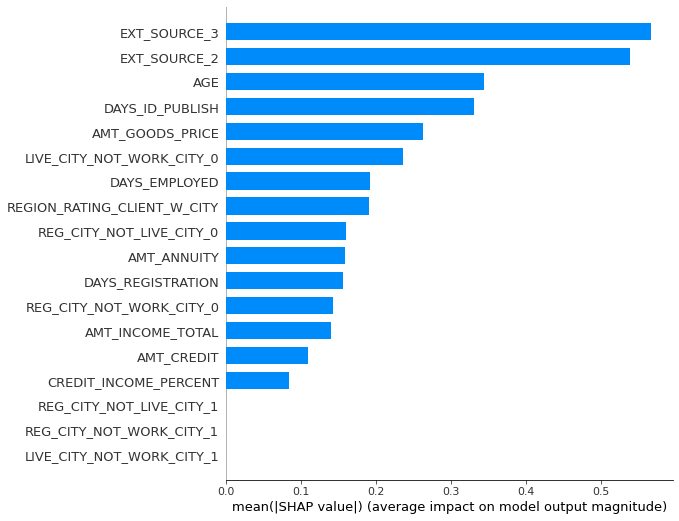

In [73]:
import shap
shap_values = shap.TreeExplainer(XGBC).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

In [74]:
# Plotting by correlation

def ABS_SHAP(df_shap,df):
    #import matplotlib as plt
    # Make a copy of the input data
    shap_v = pd.DataFrame(df_shap)
    feature_list = df.columns
    shap_v.columns = feature_list
    df_v = df.copy().reset_index().drop('index',axis=1)
    
    # We Determine the correlation in order to plot with different colors
    corr_list = list()
    for i in feature_list:
        b = np.corrcoef(shap_v[i],df_v[i])[1][0]
        corr_list.append(b)
    corr_df = pd.concat([pd.Series(feature_list),pd.Series(corr_list)],axis=1).fillna(0)
    
    #  We create a data frame. Column 1 is the feature, and Column 2 is the correlation coefficient
    corr_df.columns  = ['Variable','Corr']
    corr_df['Sign'] = np.where(corr_df['Corr']>0,'red','blue')
    
    # Plot it
    shap_abs = np.abs(shap_v)
    k=pd.DataFrame(shap_abs.mean()).reset_index()
    k.columns = ['Variable','SHAP_abs']
    k2 = k.merge(corr_df,left_on = 'Variable',right_on='Variable',how='inner')
    k2 = k2.sort_values(by='SHAP_abs',ascending = True)
    colorlist = k2['Sign']
    ax = k2.plot.barh(x='Variable',y='SHAP_abs',color = colorlist, figsize=(14,5),legend = False)
    ax.set_xlabel("SHAP Value (Red = Positive Impact)")

invalid value encountered in true_divide
invalid value encountered in true_divide


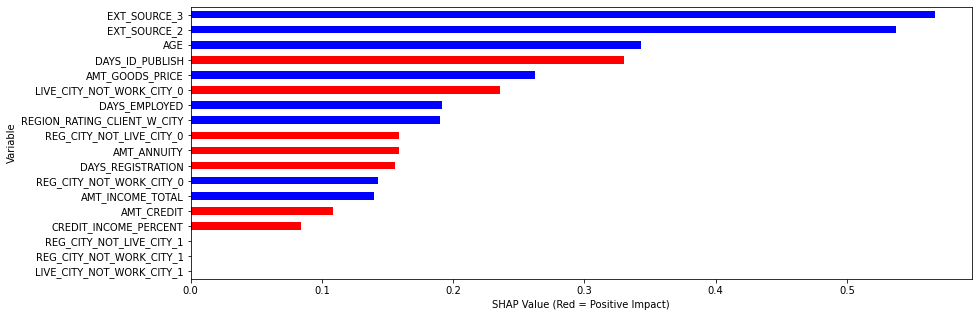

In [75]:
ABS_SHAP(shap_values, X_train) 

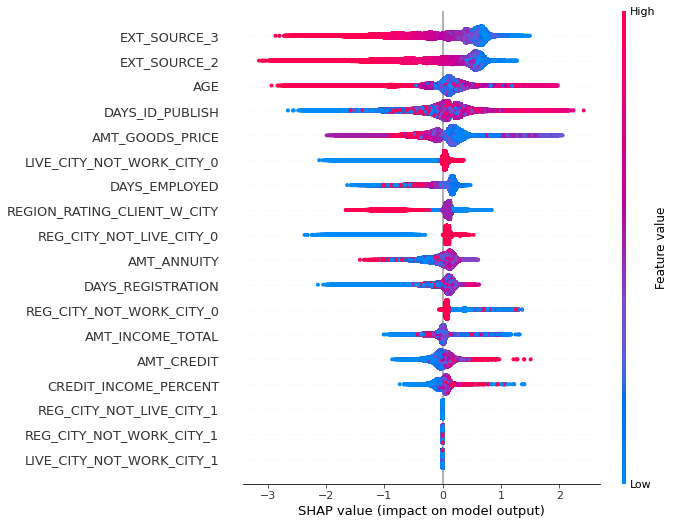

In [76]:
shap.summary_plot(shap_values, X_train)

## ROC curve

Roc curve plots false positives' rate compared at True positives' rate for each possible threshold

In [77]:
from sklearn.model_selection import cross_val_predict
# Applying decision function method
y_scores = cross_val_predict(XGBC, X_train, y_train, cv = 5)

In [78]:
from sklearn.metrics import roc_curve

# ROC curve
fpr, tpr, thresholds = roc_curve(y_train, y_scores)

In [79]:
def plot_roc_curve(fpr, tpr, label = None):
    
    
    # Defining figure and axes
    plt.figure(figsize=(10,6))
    ax=plt.subplot()
    
    # Plotting roc_curve
    plt.plot(fpr, tpr, linewidth = 2, label = label)
    # Potting dotted diagonal
    plt.plot([0, 1], [0, 1], 'k--')

No handles with labels found to put in legend.


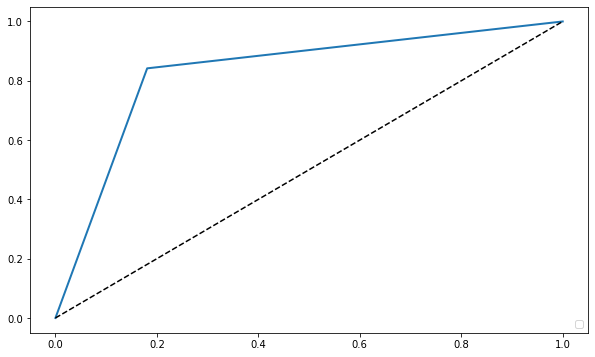

In [80]:
plot_roc_curve(fpr, tpr)
plt.legend(loc = 'lower right')